In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


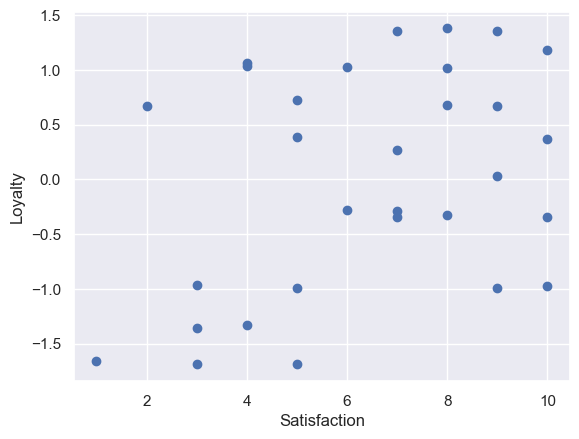

In [9]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.ylabel('Loyalty')
plt.xlabel('Satisfaction')
plt.show()

In [4]:
x = data.copy()
x

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [6]:
identifyClusters = kmeans.fit_predict(x)
dataWithClusters = data.copy()
dataWithClusters['Cluster'] = identifyClusters
dataWithClusters

,Satisfaction,Loyalty,Cluster
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


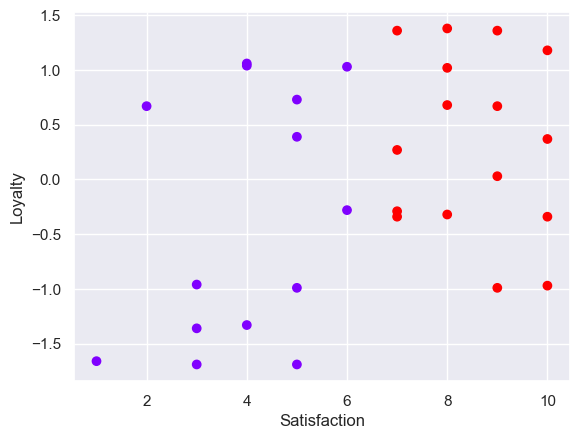

In [8]:
plt.scatter(dataWithClusters['Satisfaction'], dataWithClusters['Loyalty'], c=dataWithClusters['Cluster'], cmap='rainbow')
plt.ylabel('Loyalty')
plt.xlabel('Satisfaction')
plt.show()

Well, we can see that the clusters are based around satisfaction level 6. Clearly, kmeans disregarded the loyalty feature in the algorithm. To fix this, we have to standardize both features. 

In [10]:
from sklearn import preprocessing
xScaled = preprocessing.scale(x)
xScaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

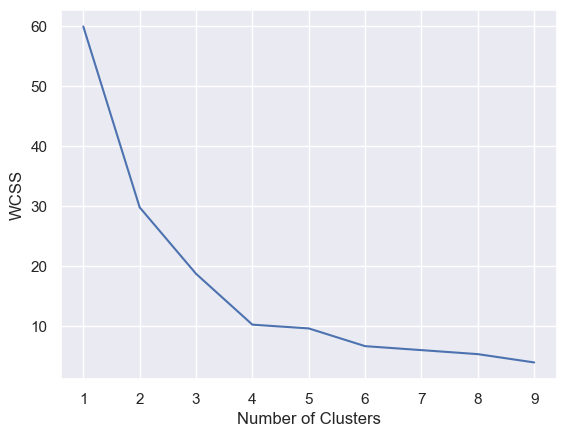

In [14]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(xScaled)
    currWCSS = kmeans.inertia_
    wcss.append(currWCSS)

clusterNumber = range(1, 10)
plt.plot(clusterNumber, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

There are many divots here, so we should check for all of these. Our cluster numbers will be 2, 3, 4 and 5.

In [21]:
newKMeans = KMeans(4)
newKMeans.fit(xScaled)
newClusters = data.copy()
newClusters['Cluster'] = newKMeans.fit_predict(xScaled)
newClusters

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


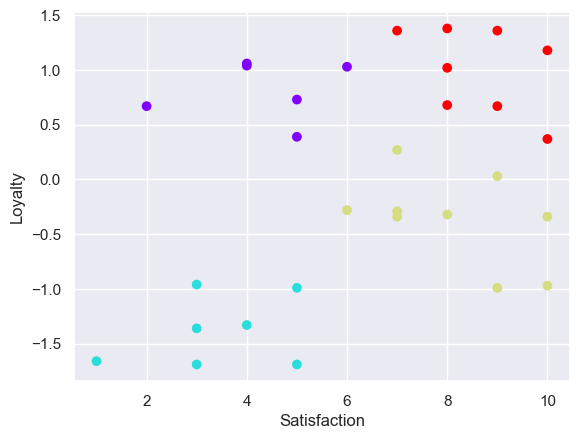

In [23]:
plt.scatter(newClusters['Satisfaction'], newClusters['Loyalty'], c=newClusters['Cluster'], cmap='rainbow')
plt.ylabel('Loyalty')
plt.xlabel('Satisfaction')
plt.show()

We can see that 4 is the best clustering solution, after trying all the other solutions.